# D-optimal experiment design: comparing ABPG and Frank-Wolfe
Solve the D-Optimal experiment design problem
$$
\begin{array}{ll}
\textrm{minimize}   & F(x):=\log\left(\det\left(\sum_{i=1}^n x_i V_i V_i^T\right)\right) \\
\textrm{subject to} & \sum_{i=1}^n x_i = 1, \\ 
                    & x_i\geq 0, \quad i=1,\ldots,n
\end{array}
$$
where $V_i\in R^m$ for $i=1,\ldots,n$.

Methods compared:
* Accelerated Bregman Proximal Gradient (ABPG) method with gain adaption
* Original Frank-Wolfe method
* Frank-Wolfe method with away steps

In [1]:
cd  C:\\github\accbpg

C:\github\accbpg


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'serif'})
#matplotlib.rcParams.update({'text.usetex': True})

import accbpg
import imp
imp.reload(accbpg)

<module 'accbpg' from 'C:\\github\\accbpg\\accbpg\\__init__.py'>

In [3]:
# Generate a random problem instance, and Khachiyan initial point
f1, h1, L1, x01Kh = accbpg.D_opt_design(30, 1000)
# Construct the Kumar-Yildirim initial point
x01KY = accbpg.D_opt_KYinit(f1.H)

x1FWKh, F1FWKh, _, _, T1FWKh = accbpg.D_opt_FW(f1.H, x01Kh, 1e-8, 1000000, verbskip=100000)
x1FWKY, F1FWKY, _, _, T1FWKY = accbpg.D_opt_FW(f1.H, x01KY, 1e-8, 1000000, verbskip=100000)
x1WAKh, F1WAKh, _, _, T1WAKh = accbpg.D_opt_WATY(f1.H, x01Kh, 1e-8, 10000, verbskip=1000)
x1WAKY, F1WAKY, _, _, T1WAKY = accbpg.D_opt_WATY(f1.H, x01KY, 1e-8, 10000, verbskip=1000)
# ABPG cannot take initial points on the boundary of simplex, so use a mixture
x01Mx = (1-1e-4)*x01KY + 1e-4*x01Kh
x1LSKh, F1LSKh, _, T1LSKh = accbpg.BPG(f1, h1, L1, x01Kh, maxitrs=10000, linesearch=True, verbskip=1000)
x1LSKY, F1LSKY, _, T1LSKY = accbpg.BPG(f1, h1, L1, x01Mx, maxitrs=10000, linesearch=True, verbskip=1000)
x1ABKh, F1ABKh, _, _, _, T1ABKh = accbpg.ABPG_gain(f1, h1, L1, x01Kh, gamma=2, maxitrs=10000, verbskip=1000)
x1ABKY, F1ABKY, _, _, _, T1ABKY = accbpg.ABPG_gain(f1, h1, L1, x01Mx, gamma=2, maxitrs=12000, verbskip=1000)


Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   3.480e-01   9.945e-01   5.897e-01     0.0
100000  -9.232e+00   2.965e-04   7.039e-01     6.9
200000  -9.234e+00   1.301e-04   7.039e-01    13.4
300000  -9.235e+00   9.212e-05   7.039e-01    20.3
400000  -9.235e+00   7.081e-05   7.039e-01    26.9
500000  -9.235e+00   5.910e-05   7.040e-01    33.5
600000  -9.235e+00   4.716e-05   7.039e-01    40.5
700000  -9.236e+00   3.958e-05   7.039e-01    47.1
800000  -9.236e+00   3.608e-05   7.040e-01    53.9
900000  -9.236e+00   3.193e-05   7.039e-01    60.6

Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0  -4.414e-02   2.353e+00   4.120e-01     0.0
100000  -9.232e+00   2.899e-04   4.525e-01     6.6
200000  -9.234e+00   1.486e-04   4.525e-01    13.6
300000  -9.235e+00   9.624e-05   4.525e-01    20.2
400000  -9.235e+00   7.176e-05   4.525e-01    26.8
500000  -9.235e+00   5.

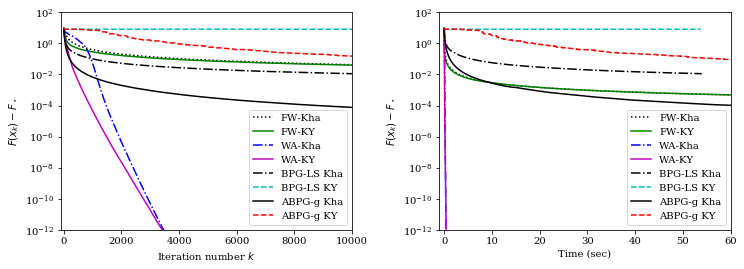

In [4]:
# Plot the objective gap and estimated gains for triangle scaling
plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.3)

y_vals = [F1FWKh, F1FWKY, F1WAKh, F1WAKY, F1LSKh, F1LSKY, F1ABKh, F1ABKY]
t_vals = [T1FWKh, T1FWKY, T1WAKh, T1WAKY, T1LSKh, T1LSKY, T1ABKh, T1ABKY]
labels = [r"FW-Kha", r"FW-KY", r"WA-Kha", r"WA-KY", r"BPG-LS Kha", r"BPG-LS KY", r"ABPG-g Kha", r"ABPG-g KY"]

ax1 = plt.subplot(1, 2, 1)
accbpg.plot_comparisons(ax1, y_vals, labels, x_vals=[], plotdiff=True, axlog="y", xlim=[-100, 10000], ylim=[1e-12, 1e2], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc="lower right", 
                        linestyles=['k:', 'g-', 'b-.', 'm-', 'k-.', 'c--', 'k-', 'r--'])

ax2 = plt.subplot(1, 2, 2)
accbpg.plot_comparisons(ax2, y_vals, labels, x_vals=t_vals, plotdiff=True, axlog="y", xlim=[-1, 60], ylim=[1e-12, 1e2], 
                        xlabel=r"Time (sec)", ylabel=r"$F(x_k)-F_\star$", legendloc="", 
                        linestyles=['k:', 'g-', 'b-.', 'm-', 'k-.', 'c--', 'k-', 'r--'])

In [5]:
# Generate a random problem instance, and Khachiyan initial point
f2, h2, L2, x02Kh = accbpg.D_opt_design(30, 10000)
# Construct the Kumar-Yildirim initial point
x02KY = accbpg.D_opt_KYinit(f2.H)

x2FWKh, F2FWKh, _, _, T2FWKh = accbpg.D_opt_FW(f2.H, x02Kh, 1e-8, 100000, verbskip=10000)
x2FWKY, F2FWKY, _, _, T2FWKY = accbpg.D_opt_FW(f2.H, x02KY, 1e-8, 100000, verbskip=10000)
x2WAKh, F2WAKh, _, _, T2WAKh = accbpg.D_opt_WATY(f2.H, x02Kh, 1e-8, 20000, verbskip=1000)
x2WAKY, F2WAKY, _, _, T2WAKY = accbpg.D_opt_WATY(f2.H, x02KY, 1e-8, 20000, verbskip=1000)
# ABPG cannot take initial points on the boundary of simplex, so use a mixture
x02Mx = (1-1e-3)*x02KY + 1e-3*x02Kh
x2LSKh, F2LSKh, _, T2LSKh = accbpg.BPG(f2, h2, L2, x02Kh, maxitrs=10000, linesearch=True, verbskip=1000)
x2LSKY, F2LSKY, _, T2LSKY = accbpg.BPG(f2, h2, L2, x02Mx, maxitrs=10000, linesearch=True, verbskip=1000)
x2ABKh, F2ABKh, _, _, _, T2ABKh = accbpg.ABPG_gain(f2, h2, L2, x02Kh, gamma=2, maxitrs=10000, verbskip=1000)
x2ABKY, F2ABKY, _, _, _, T2ABKY = accbpg.ABPG_gain(f2, h2, L2, x02Mx, gamma=2, maxitrs=10000, verbskip=1000)


Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   5.231e-02   1.241e+00   7.040e-01     0.0
 10000  -1.563e+01   2.920e-03   8.220e-01     1.8
 20000  -1.565e+01   1.486e-03   8.222e-01     3.7
 30000  -1.566e+01   9.542e-04   8.222e-01     5.4
 40000  -1.566e+01   6.845e-04   8.222e-01     7.2
 50000  -1.566e+01   5.922e-04   8.222e-01     9.0
 60000  -1.566e+01   4.753e-04   8.222e-01    10.9
 70000  -1.566e+01   4.073e-04   8.223e-01    12.8
 80000  -1.567e+01   3.667e-04   8.223e-01    14.7
 90000  -1.567e+01   3.198e-04   8.223e-01    16.7

Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0  -4.389e+00   2.310e+00   2.400e-01     0.0
 10000  -1.563e+01   2.751e-03   3.889e-01     1.8
 20000  -1.565e+01   1.390e-03   3.889e-01     3.5
 30000  -1.566e+01   9.163e-04   3.890e-01     5.4
 40000  -1.566e+01   6.865e-04   3.890e-01     7.2
 50000  -1.566e+01   5.

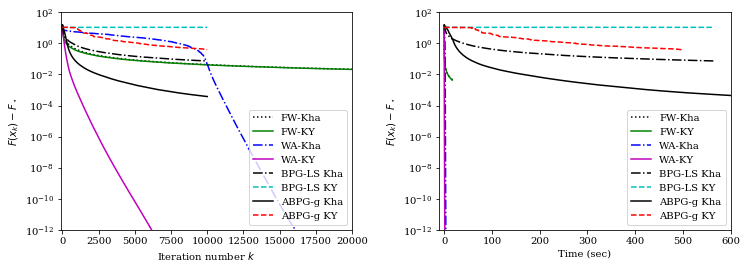

In [11]:
# Plot the objective gap and estimated gains for triangle scaling
plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.3)

y_vals = [F2FWKh, F2FWKY, F2WAKh, F2WAKY, F2LSKh, F2LSKY, F2ABKh, F2ABKY]
t_vals = [T2FWKh, T2FWKY, T2WAKh, T2WAKY, T2LSKh, T2LSKY, T2ABKh, T2ABKY]
labels = [r"FW-Kha", r"FW-KY", r"WA-Kha", r"WA-KY", r"BPG-LS Kha", r"BPG-LS KY", r"ABPG-g Kha", r"ABPG-g KY"]

ax1 = plt.subplot(1, 2, 1)
accbpg.plot_comparisons(ax1, y_vals, labels, x_vals=[], plotdiff=True, axlog="y", xlim=[-100, 20000], ylim=[1e-12, 1e2], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc="lower right", 
                        linestyles=['k:', 'g-', 'b-.', 'm-', 'k-.', 'c--', 'k-', 'r--'])

ax2 = plt.subplot(1, 2, 2)
accbpg.plot_comparisons(ax2, y_vals, labels, x_vals=t_vals, plotdiff=True, axlog="y", xlim=[-10, 600], ylim=[1e-12, 1e2], 
                        xlabel=r"Time (sec)", ylabel=r"$F(x_k)-F_\star$", legendloc="", 
                        linestyles=['k:', 'g-', 'b-.', 'm-', 'k-.', 'c--', 'k-', 'r--'])

In [8]:
import imp
imp.reload(accbpg)

# Generate a random problem instance, and Khachiyan initial point
f3, h3, L3, x03Kh = accbpg.D_opt_design(1000, 2000)
# Construct the Kumar-Yildirim initial point
x03KY = accbpg.D_opt_KYinit(f3.H)

x3FWKh, F3FWKh, _, _, T3FWKh = accbpg.D_opt_FW(f3.H, x03Kh, 1e-8, 10000, verbskip=1000)
x3FWKY, F3FWKY, _, _, T3FWKY = accbpg.D_opt_FW(f3.H, x03KY, 1e-8, 10000, verbskip=1000)
x3WAKh, F3WAKh, _, _, T3WAKh = accbpg.D_opt_WATY(f3.H, x03Kh, 1e-8, 10000, verbskip=1000)
x3WAKY, F3WAKY, _, _, T3WAKY = accbpg.D_opt_WATY(f3.H, x03KY, 1e-8, 10000, verbskip=1000)
# ABPG cannot take initial points on the boundary of simplex, so use a mixture
x03Mx = (1-1e-4)*x03KY + 1e-4*x03Kh
x3LSKh, F3LSKh, _, T3LSKh = accbpg.BPG(f3, h3, L3, x03Kh, maxitrs=10000, linesearch=True, verbskip=1000)
x3LSKY, F3LSKY, _, T3LSKY = accbpg.BPG(f3, h3, L3, x03Mx, maxitrs=10000, linesearch=True, verbskip=1000)
x3ABKh, F3ABKh, _, _, _, T3ABKh = accbpg.ABPG_gain(f3, h3, L3, x03Kh, gamma=2, maxitrs=10000, restart=True, verbskip=1000)
x3ABKY, F3ABKY, _, _, _, T3ABKY = accbpg.ABPG_gain(f3, h3, L3, x03Mx, gamma=2, maxitrs=10000, restart=True, verbskip=1000)


Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   3.096e+02   1.245e-01   1.098e-01     0.3
  1000   3.089e+02   1.934e-02   9.581e-02    21.8
  2000   3.087e+02   1.158e-02   8.989e-02    43.1
  3000   3.087e+02   8.363e-03   8.617e-02    64.5
  4000   3.087e+02   6.651e-03   8.345e-02    85.9
  5000   3.086e+02   5.371e-03   8.113e-02   107.2
  6000   3.086e+02   4.642e-03   7.922e-02   128.4
  7000   3.086e+02   4.030e-03   7.756e-02   149.9
  8000   3.086e+02   3.546e-03   7.606e-02   171.4
  9000   3.086e+02   3.244e-03   7.485e-02   192.6

Solving D-opt design problem using Frank-Wolfe method
     k      F(x)     pos_slack   neg_slack    time
     0   3.096e+02   1.245e-01   1.098e-01     0.2
  1000   3.089e+02   1.934e-02   9.581e-02    21.4
  2000   3.087e+02   1.158e-02   8.989e-02    42.6
  3000   3.087e+02   8.363e-03   8.617e-02    63.8
  4000   3.087e+02   6.651e-03   8.345e-02    85.3
  5000   3.086e+02   5.

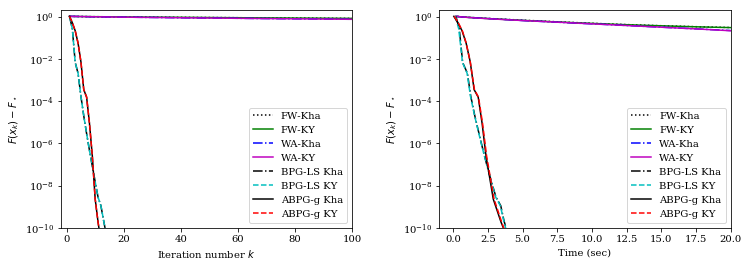

In [12]:
# Plot the objective gap and estimated gains for triangle scaling
plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.3)

y_vals = [F3FWKh, F3FWKY, F3WAKh, F3WAKY, F3LSKh, F3LSKY, F3ABKh, F3ABKY]
t_vals = [T3FWKh, T3FWKY, T3WAKh, T3WAKY, T3LSKh, T3LSKY, T3ABKh, T3ABKY]
labels = [r"FW-Kha", r"FW-KY", r"WA-Kha", r"WA-KY", r"BPG-LS Kha", r"BPG-LS KY", r"ABPG-g Kha", r"ABPG-g KY"]

ax1 = plt.subplot(1, 2, 1)
accbpg.plot_comparisons(ax1, y_vals, labels, x_vals=[], plotdiff=True, axlog="y", xlim=[-2, 100], ylim=[1e-10, 2], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc="lower right", 
                        linestyles=['k:', 'g-', 'b-.', 'm-', 'k-.', 'c--', 'k-', 'r--'])

ax2 = plt.subplot(1, 2, 2)
accbpg.plot_comparisons(ax2, y_vals, labels, x_vals=t_vals, plotdiff=True, axlog="y", xlim=[-1, 20], ylim=[1e-10, 2], 
                        xlabel=r"Time (sec)", ylabel=r"$F(x_k)-F_\star$", legendloc="", 
                        linestyles=['k:', 'g-', 'b-.', 'm-', 'k-.', 'c--', 'k-', 'r--'])